In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import warnings

In [4]:
df = pd.read_csv('/content/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Dataset Overview

The primary file, athlete_events.csv, contains 15 columns, detailing individual athlete performances in various events across both Summer and Winter Games. Key information includes:

- ID: Unique identifier for each athlete
- Name: Athlete's full name
- Sex: Gender (M or F)
- Age: Athlete's age at the time of competition
- Height: Height in centimeters
- Weight: Weight in kilograms
- Team: Team or country name
- NOC: National Olympic Committee 3-letter code
- Games: Year and season of the Games
- Year: Year of the event
- Season: Summer or Winter Games
- City: Host city of the event
- Sport: Sport category
- Event: Specific event within the sport
- Medal: Medal won (Gold, Silver, Bronze, or NA)

In [5]:
df.shape

(271116, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [8]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
df.dtypes

,0
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


# Handling Missing Values and Dropping Unnecessary Features

In [10]:
# Since we won't be having any analysis about Height and Weight features, we will drop them
df = df.drop(columns=['Height', 'Weight'])

In [11]:
df.duplicated().sum()

1385

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
# Fill missing values in 'age' column with the mean of 'age'
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [15]:
# Fill missing values in 'medal' column with the string 'no medal'
df['Medal'] = df['Medal'].fillna('No Medal')

In [16]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Team,0
NOC,0
Games,0
Year,0
Season,0
City,0


# DATA ANALYSIS

In [18]:
Top_10_countries=df.Team.value_counts().sort_values(ascending=False).head(10)
Top_10_countries

,count
Team,
United States,17598
France,11817
Great Britain,11264
Italy,10213
Germany,9230
Canada,9226
Japan,8269
Sweden,8004
Australia,7512


<ipython-input-19-2f189ed2535d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = Top_10_countries.index , y = Top_10_countries , palette = 'Set1');


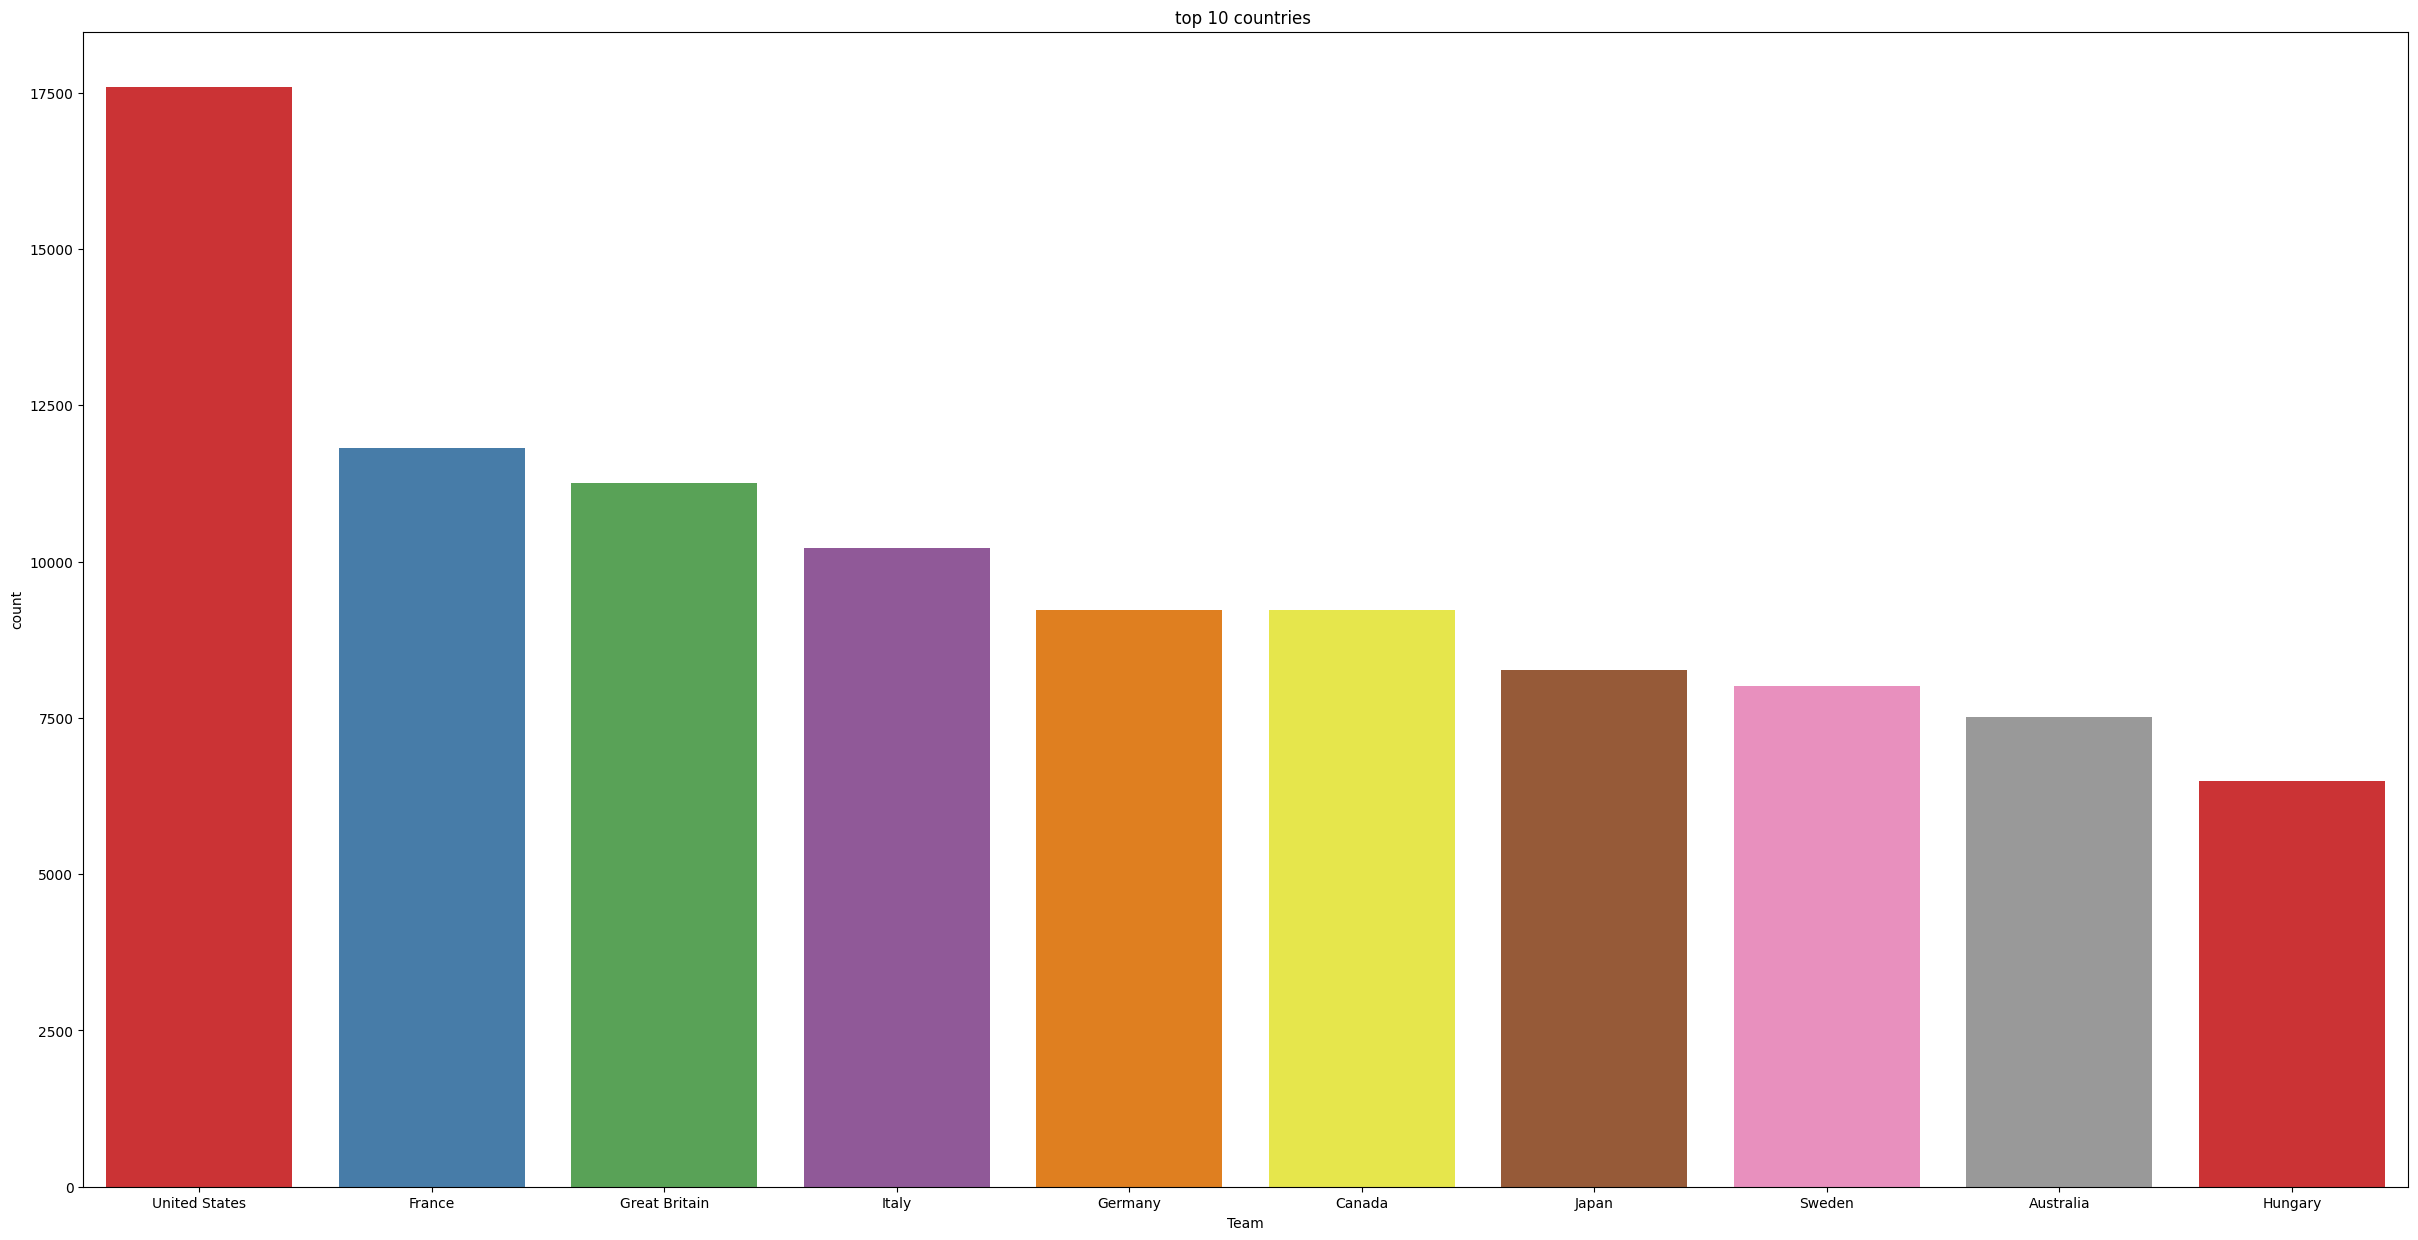

In [19]:
plt.figure(figsize=(30,15))
plt.title('top 10 countries ')
sns.barplot( x = Top_10_countries.index , y = Top_10_countries , palette = 'Set1');

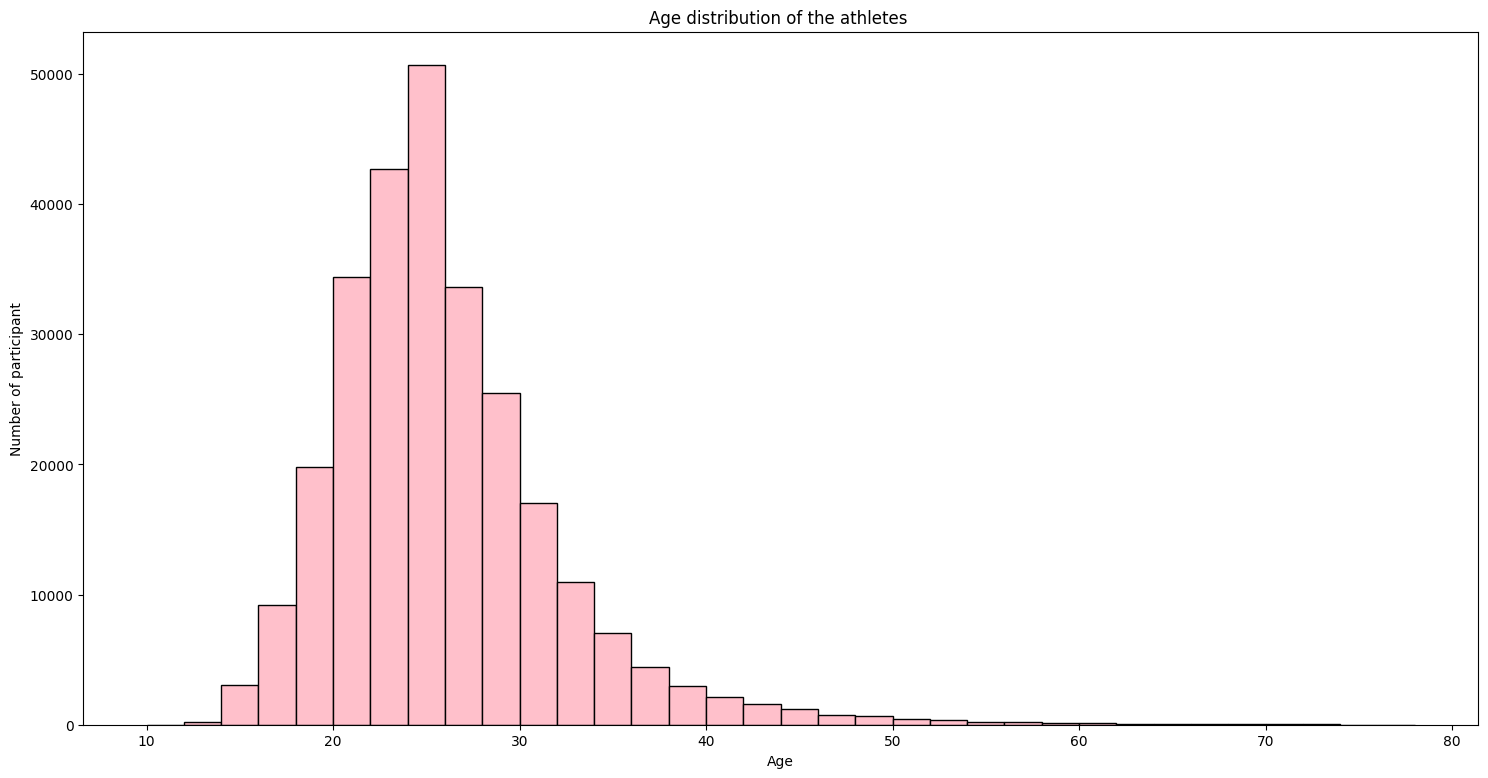

In [20]:
plt.figure(figsize=(18,9))
plt.title('Age distribution of the athletes ')
plt.xlabel('Age')
plt.ylabel('Number of participant')
plt.hist(df.Age , bins = np.arange(10,80,2) , color='pink', edgecolor='black');

In [21]:
winter_sports=df[df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [22]:
Summer_sports=df[df.Season=='Summer'].Sport.unique()
Summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [23]:
# male and female participants
gender_counts = df.Sex.value_counts()
gender_counts

,count
Sex,
M,195353
F,74378


([<matplotlib.patches.Wedge at 0x7ced51a03890>,
 [Text(0.1979142257523129, -1.0820489634230341, 'M'),
  Text(-0.1979142257523128, 1.0820489634230341, 'F')],
 [Text(0.10795321404671612, -0.5902085255034731, '72.4%'),
  Text(-0.10795321404671605, 0.5902085255034731, '27.6%')])

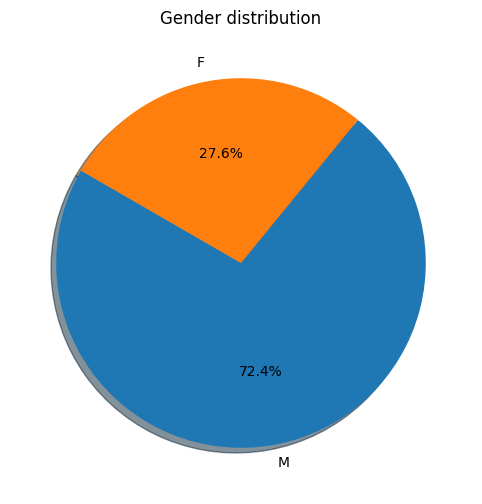

In [24]:
plt.figure(figsize=(12,6))
plt.title('Gender distribution')
plt.pie(gender_counts, autopct='%1.1f%%', labels=gender_counts.index, startangle=150, shadow=True)

In [25]:
df['Medal'].value_counts()

,count
Medal,
No Medal,229959
Gold,13369
Bronze,13295
Silver,13108


In [26]:
female_participants = df[(df.Sex=='F')&(df.Season=='Summer')][['Sex',"Year"]]
female_participants = female_participants.groupby("Year").count().reset_index()
female_participants.head(10)

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,234
7,1928,391
8,1932,265
9,1936,447


In [27]:
female_participants = df[(df.Sex=='M')&(df.Season=='Summer')][['Sex',"Year"]]
female_participants = female_participants.groupby("Year").count().reset_index()
female_participants.head(10)

,Year,Sex
0,1896,380
1,1900,1865
2,1904,1285
3,1906,1722
4,1908,3022
5,1912,3953
6,1920,4158
7,1924,4876
8,1928,4265
9,1932,2200


In [28]:
Women_Olympics=df[(df.Sex=='F')&(df.Season=='Summer')]

In [29]:
men_Olympics=df[(df.Sex=='M')&(df.Season=='Summer')]

<ipython-input-30-929dff64dbab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=Women_Olympics, palette='RdYlBu')


Text(0.5, 1.0, 'women participation')

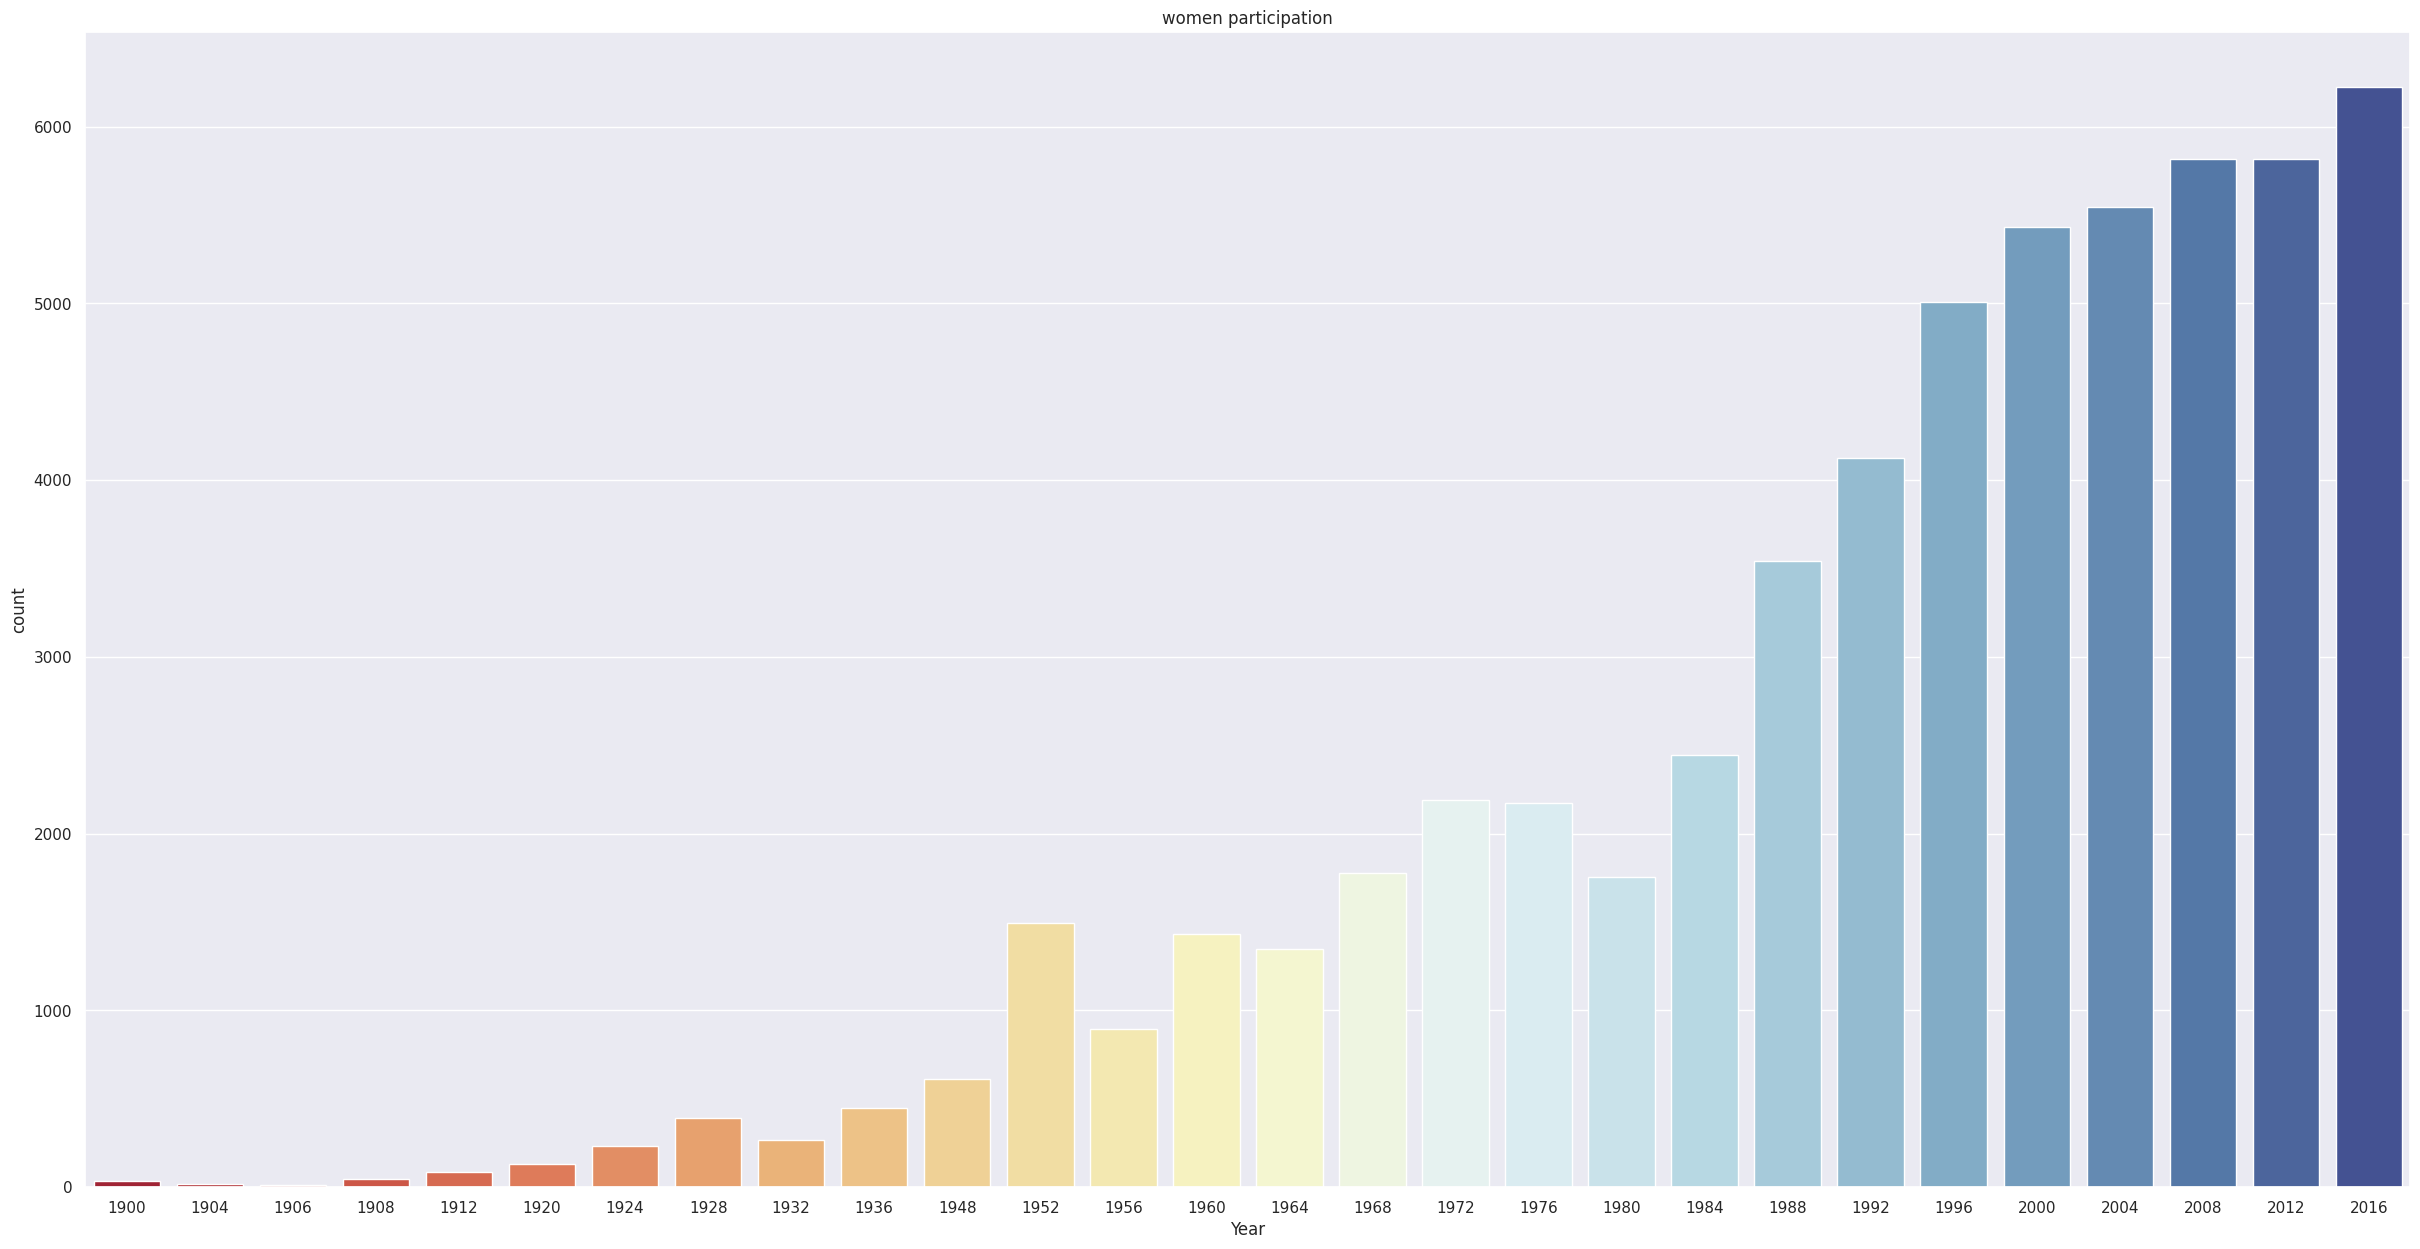

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(30,15))
sns.countplot(x='Year', data=Women_Olympics, palette='RdYlBu')
plt.title('women participation')

<ipython-input-31-27ae93b404c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=men_Olympics, palette='RdYlBu')


Text(0.5, 1.0, 'women participation')

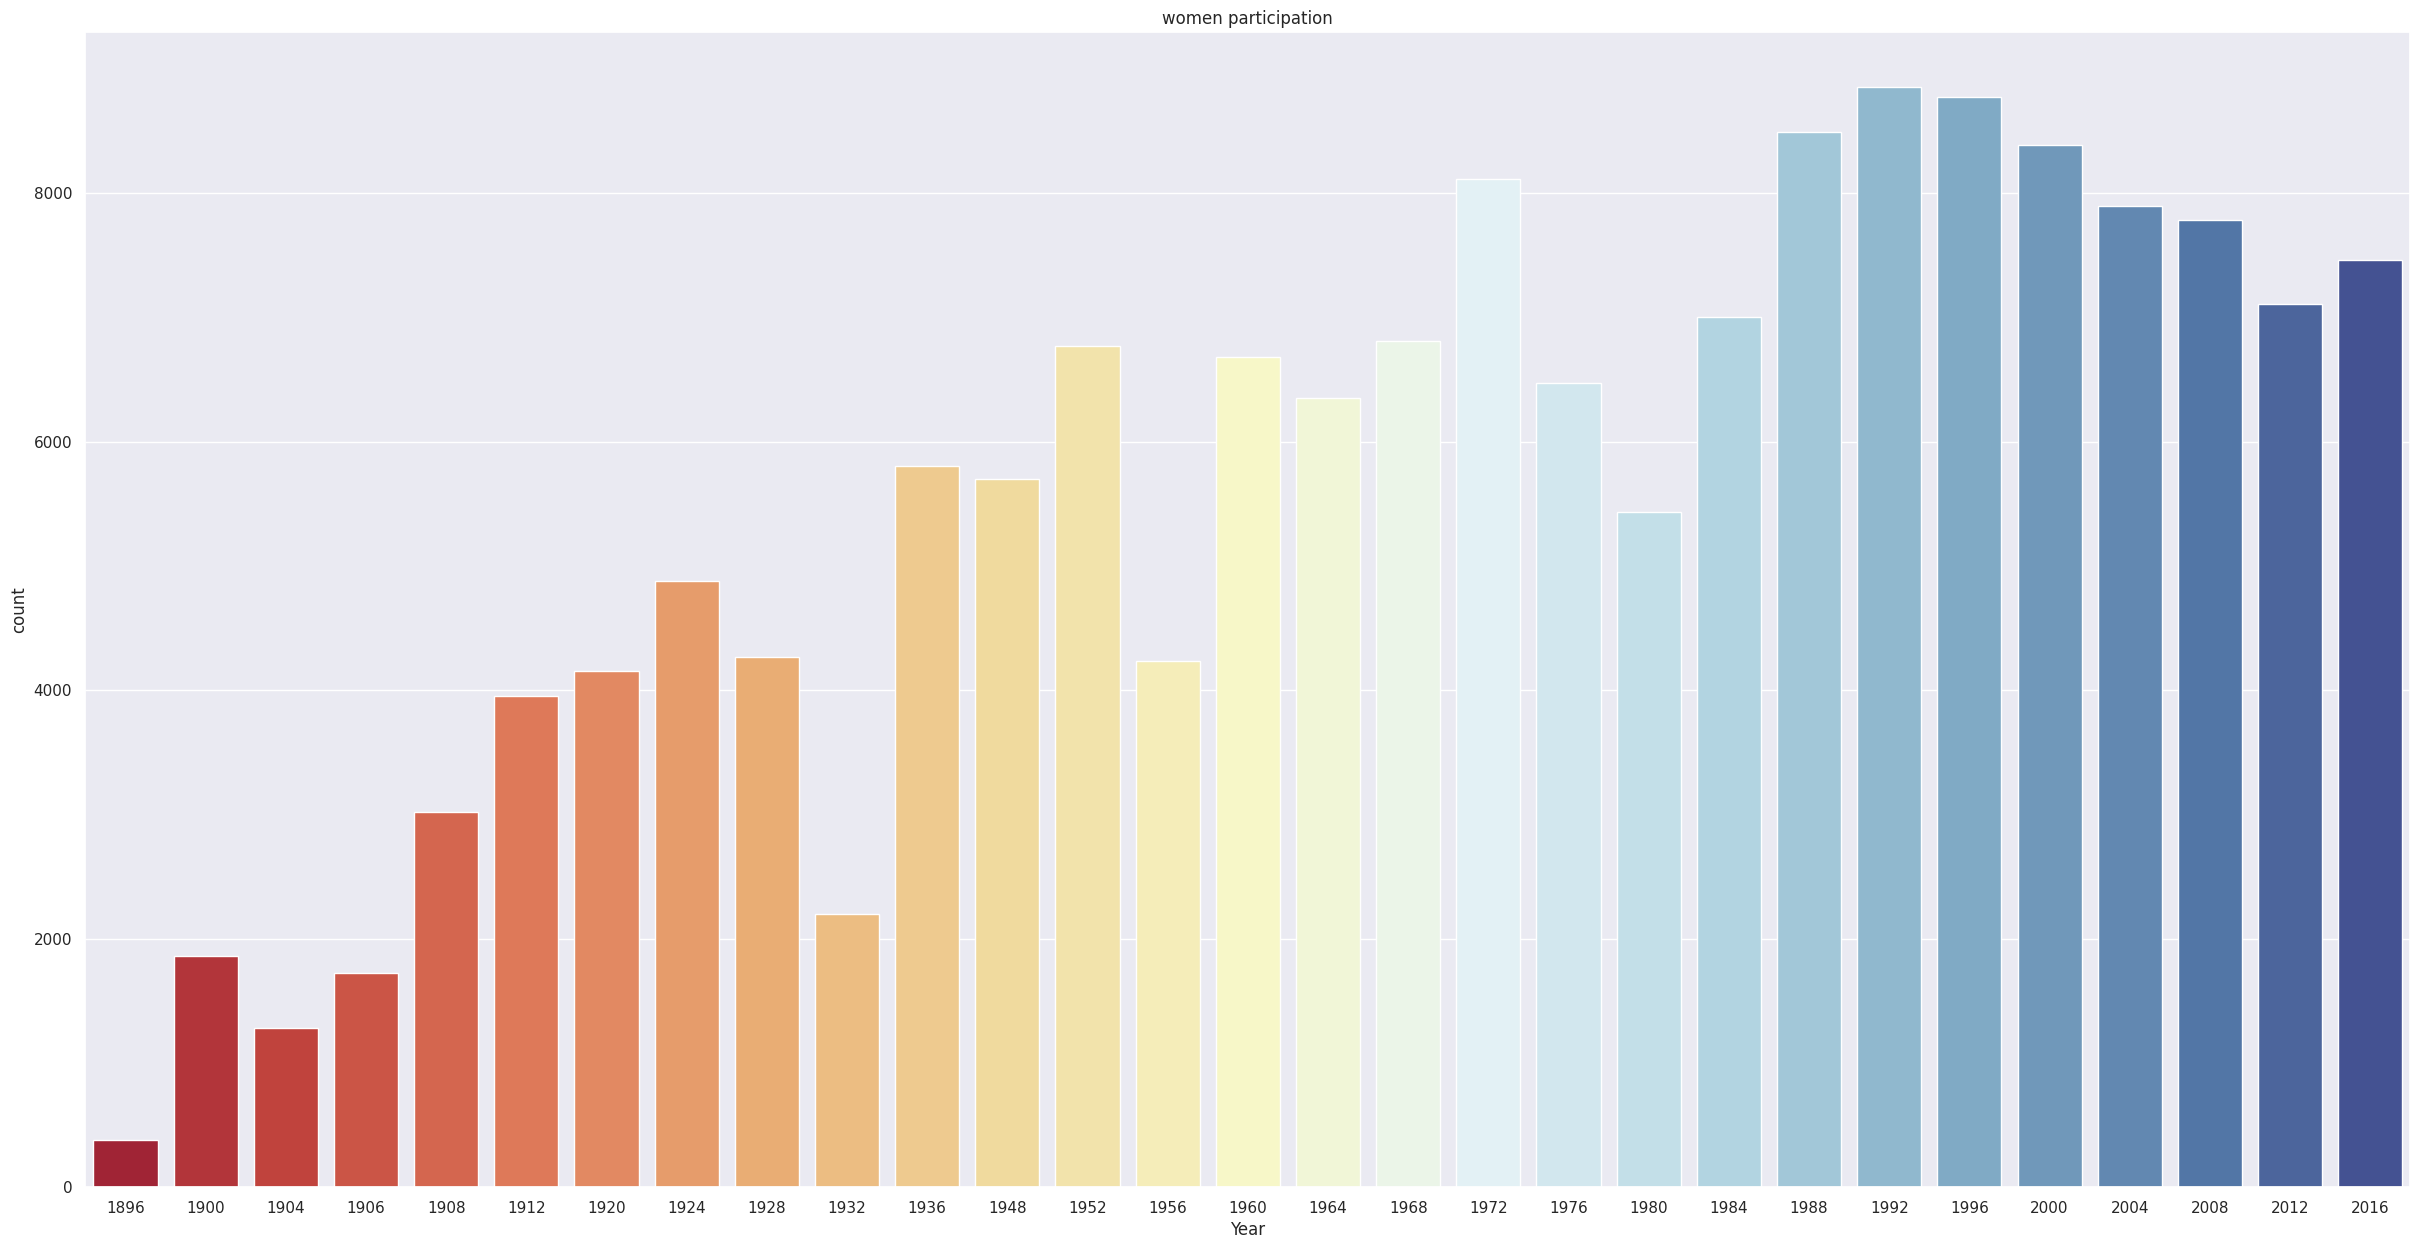

In [31]:
sns.set(style="darkgrid")
plt.figure(figsize=(30,15))
sns.countplot(x='Year', data=men_Olympics, palette='RdYlBu')
plt.title('women participation')

Text(0.5, 1.0, 'plot of females athletes through time')

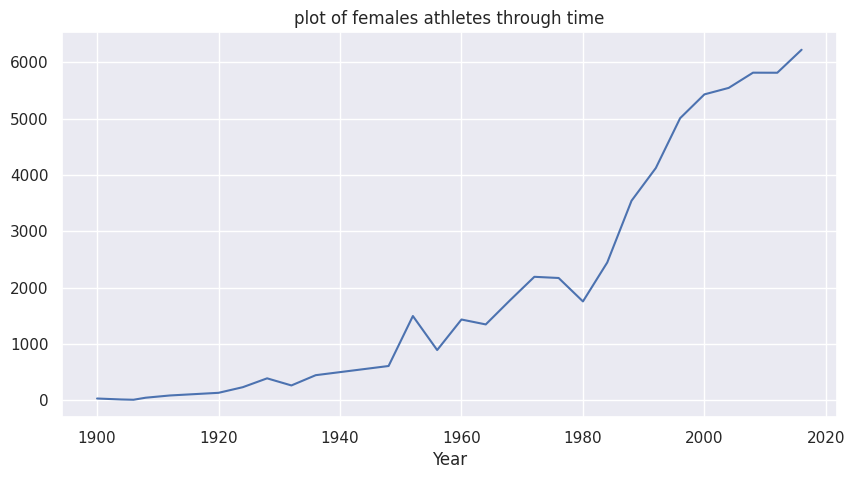

In [32]:
part=Women_Olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10,5))
part.loc[:,'F'].plot()
plt.title('plot of females athletes through time')

Text(0.5, 1.0, 'plot of male athletes through time')

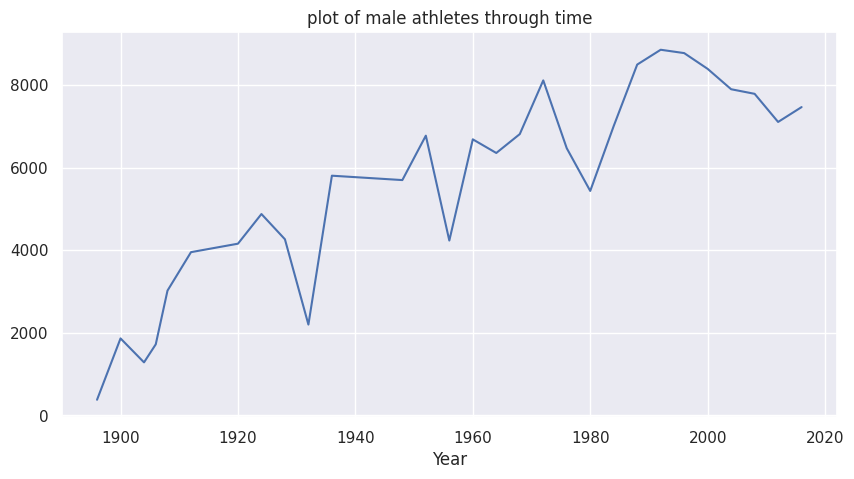

In [34]:
part=men_Olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10,5))
part.loc[:,'M'].plot()
plt.title('plot of male athletes through time')

In [35]:
gold_medals=df[df.Medal=='Gold']
gold_medals

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold
271009,135520,Julia Zwehl,F,28.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold
271049,135545,Henk Jan Zwolle,M,31.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


In [36]:
# only the value are different from NANS
gold_medals = gold_medals[np.isfinite(gold_medals['Age'])]

In [37]:
# gold medals from each country
gold_medals.Team.value_counts().reset_index(name='Medal').head(6)

,Team,Medal
0,United States,2474
1,Soviet Union,1058
2,Germany,679
3,Italy,535
4,Great Britain,519
5,France,455


Text(0.5, 1.0, 'Medal Counts for Top 5 Countries')

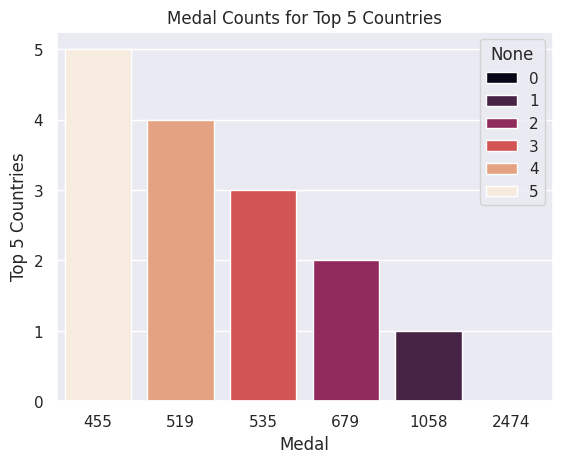

In [38]:
total_gold_models = gold_medals.Team.value_counts().reset_index(name='Medal').head(6)
sns.barplot(x='Medal', y=total_gold_models.index, hue=total_gold_models.index, data=total_gold_models, palette='rocket')
plt.xlabel("Medal")
plt.ylabel("Top 5 Countries")  # Adjust labels as needed
plt.title("Medal Counts for Top 5 Countries")

In [39]:
max_year=df.Year.max()
max_year
team_names=df[(df.Year==max_year)&(df.Medal=="Gold")].Team
team_names.value_counts().head(10)

,count
Team,
United States,137
Great Britain,64
Russia,50
Germany,47
China,44
Brazil,34
Australia,23
Argentina,21
France,20


Text(0.5, 1.0, 'Top 20 Countries by Medal Count in 2016')

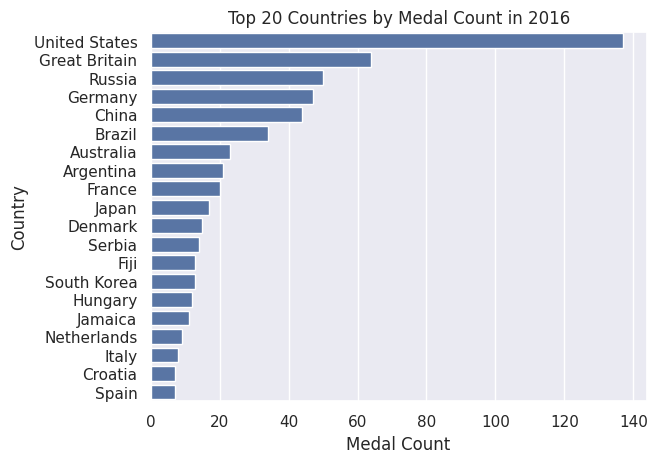

In [40]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.xlabel('Medal Count')
plt.ylabel('Country')
plt.title('Top 20 Countries by Medal Count in 2016')

<Axes: >

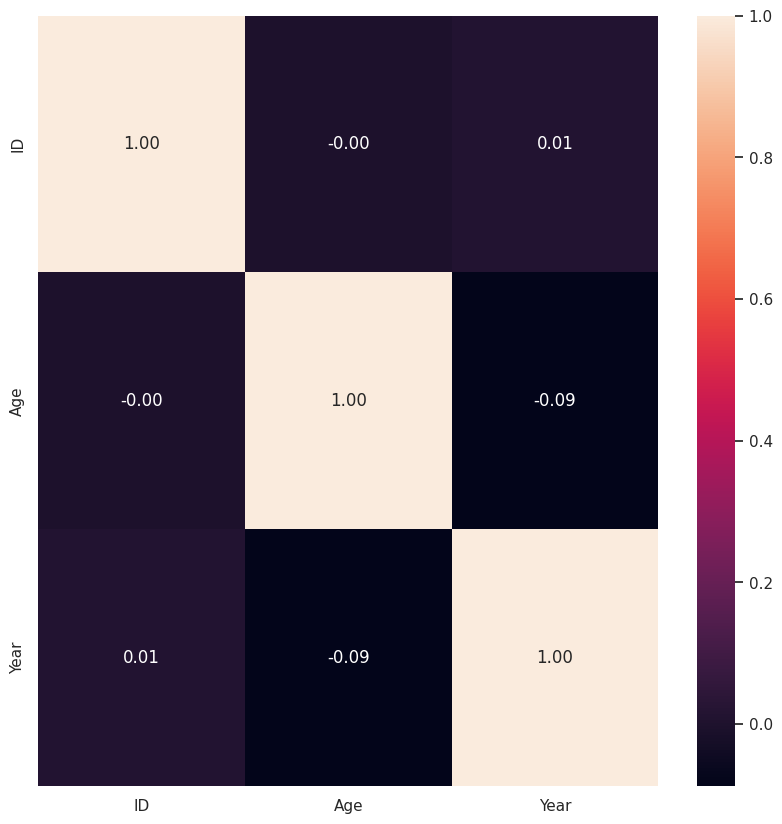

In [42]:
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10 ,10))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f')